In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\harri\OneDrive\Documents\Dataset files\Data jobs\ds_salaries new.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
Job_types = {'FT':'Full-time', 'CT':'Contract', 'FL': 'Freelance', 'PT': ' Part-Time'}
df['employment_type'] = df['employment_type'].replace(Job_types)

df['remote_ratio'] = df['remote_ratio'].astype(str)
Remote_work = {'0': 'On-site', '50': 'Hybrid', '100': 'Remote'}
df['remote_ratio'] = df['remote_ratio'].replace(Remote_work)

Work_exp = {'EN': 'Entry-level / Junior', 'MI': 'Mid-level / Intermediate', 'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director'}
df['experience_level'] = df['experience_level'].replace(Work_exp)

Company_size = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df['company_size'] = df['company_size'].replace(Company_size)

df['work_year'] = df['work_year'].astype(str)

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
Experience_location =  df.groupby(['experience_level','company_location'])['salary_in_usd'].mean().reset_index()

In [9]:
Experience_location_EL = Experience_location[Experience_location['experience_level'] == 'Entry-level / Junior']

In [10]:
Top5_Experience_location_EL=Experience_location_EL.nlargest(5,'salary_in_usd')

Text(0.5, 0.98, 'Top 5 Location with Highest Average Entry-Level Salaries')

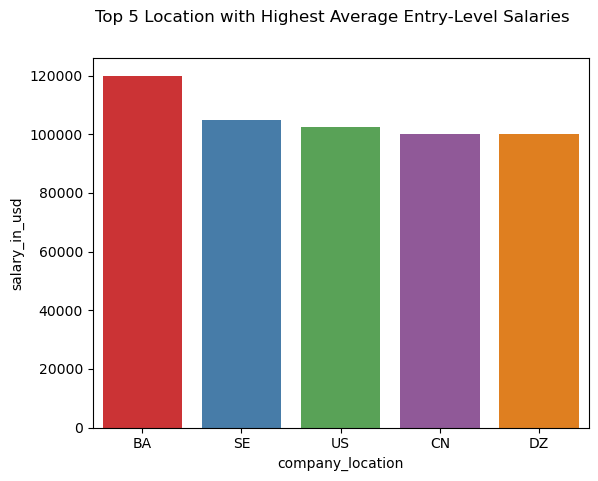

In [11]:
sns.barplot(data=Top5_Experience_location_EL, x='company_location', y='salary_in_usd', palette='Set1')
plt.suptitle("Top 5 Location with Highest Average Entry-Level Salaries")

In [12]:
Experience_location_ML = Experience_location[Experience_location['experience_level'] == 'Mid-level / Intermediate']

In [13]:
Top5_Experience_location_ML=Experience_location_ML.nlargest(5,'salary_in_usd')

Text(0.5, 0.98, 'Top 5 Location with Highest Average Intermediate-Level Salaries')

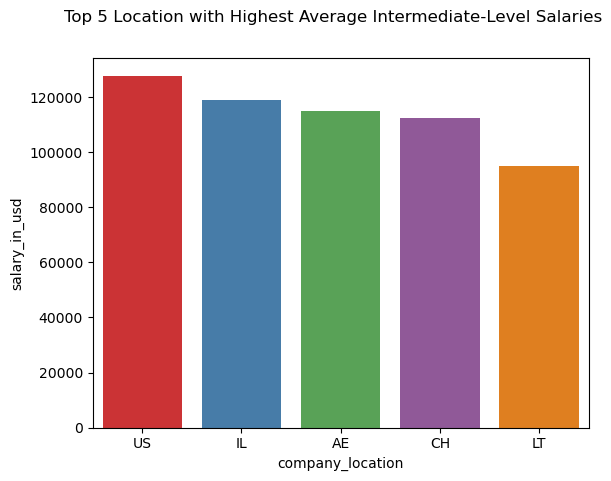

In [14]:
sns.barplot(data=Top5_Experience_location_ML, x='company_location', y='salary_in_usd', palette='Set1')
plt.suptitle("Top 5 Location with Highest Average Intermediate-Level Salaries")

In [15]:
Experience_location_SL = Experience_location[Experience_location['experience_level'] == 'Senior-level / Expert']

In [16]:
Top5_Experience_location_SL = Experience_location_SL.nlargest(5,'salary_in_usd')

Text(0.5, 0.98, 'Top 5 Location with Highest Average Senior-Level Salaries')

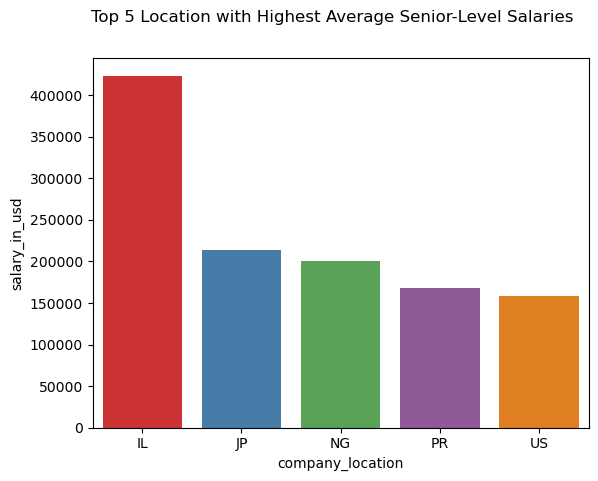

In [17]:
sns.barplot(data=Top5_Experience_location_SL, x='company_location', y='salary_in_usd', palette='Set1')
plt.suptitle("Top 5 Location with Highest Average Senior-Level Salaries")

In [18]:
Experience_location_Dir = Experience_location[Experience_location['experience_level'] == 'Executive-level / Director']

In [19]:
Top5_Experience_location_Dir =Experience_location_Dir.nlargest(5,'salary_in_usd')

Text(0.5, 0.98, 'Top 5 Location with Highest Average Executive-Level Salaries')

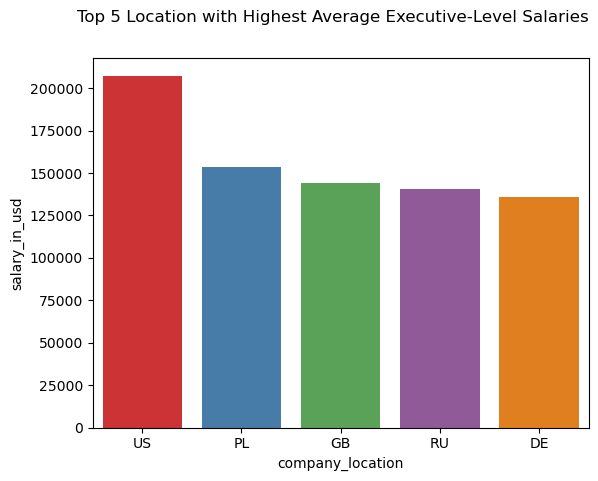

In [20]:
sns.barplot(data=Top5_Experience_location_Dir, x='company_location', y='salary_in_usd', palette='Set1')
plt.suptitle("Top 5 Location with Highest Average Executive-Level Salaries")

In [21]:
RemoteWorkSalary = df.groupby(['work_year','remote_ratio'])['salary_in_usd'].mean().reset_index()

In [22]:
RemoteWorkSalary

,work_year,remote_ratio,salary_in_usd
0,2020,Hybrid,77591.238095
1,2020,On-site,93426.187500
2,2020,Remote,99763.205128
3,2021,Hybrid,76104.407895
4,2021,On-site,92899.676471
5,2021,Remote,105812.783333
6,2022,Hybrid,84560.870968
7,2022,On-site,134719.236287
8,2022,Remote,135631.104377
9,2023,Hybrid,72053.500000


Text(0.5, 0.98, 'Salary Growth Over the Years: Hybrid, On-Site, vs Remote')

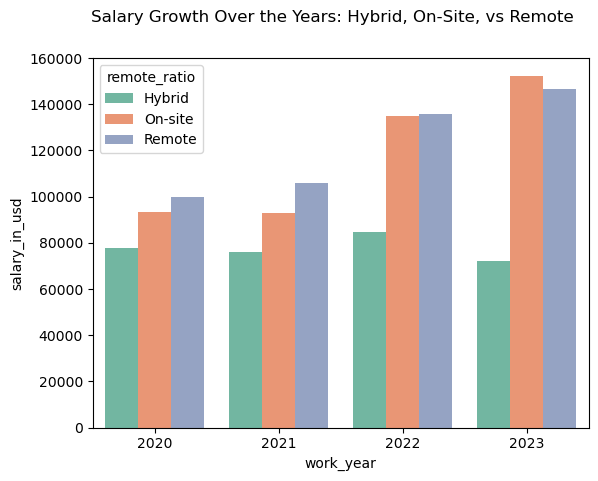

In [23]:
sns.barplot(data=RemoteWorkSalary, x='work_year', y='salary_in_usd', hue='remote_ratio', palette='Set2')
plt.suptitle("Salary Growth Over the Years: Hybrid, On-Site, vs Remote")

In [24]:
q =df.groupby('job_title')['company_size'].nunique().reset_index()

In [25]:
qt=q[q['company_size'] == 3]['job_title']

In [26]:
qwe = df[df['job_title'].isin(qt)]

In [27]:
tt = qwe.groupby(['job_title','company_size'])['salary_in_usd'].mean().reset_index()

In [28]:
dd= tt[tt['company_size'] != 'Medium' ]

Text(0.5, 0.98, 'Top Paying Job Titles by Company Size')

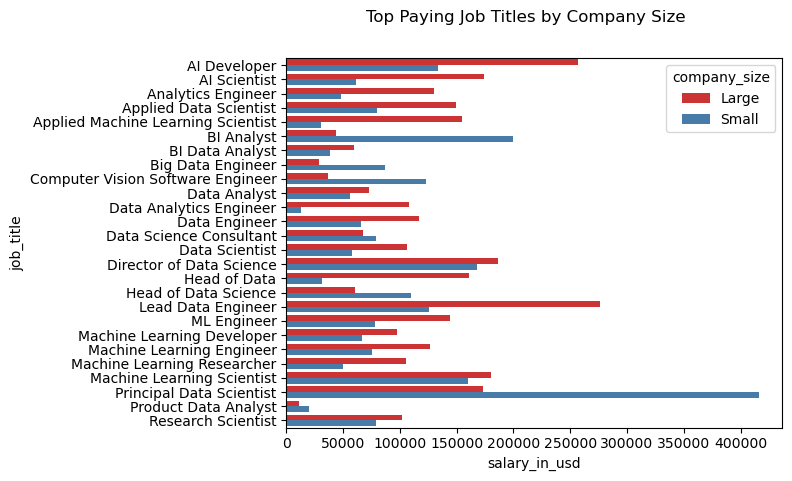

In [29]:
sns.barplot(data=dd, x='salary_in_usd', y='job_title', hue='company_size', palette='Set1',  orient='h')
plt.suptitle("Top Paying Job Titles by Company Size")